## Credit Card Fraud Detection

**By: Shraddha Choubey**

#### Importing basic libraries, and will import more library on the way.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# <a id='eda'>Exploratory Data Analysis</a>

Once the data is read into python, we need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.

Now that we have the data, I wanted to run a few initial comparisons between the three columns - Time, Amount, and Class.

In [3]:
# Reading credit card dataset

df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## <a id='unique'>Count unique values of label</a>

In [6]:
print(df['Class'].value_counts())
print('\n')
print(df['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64


0    0.998273
1    0.001727
Name: Class, dtype: float64


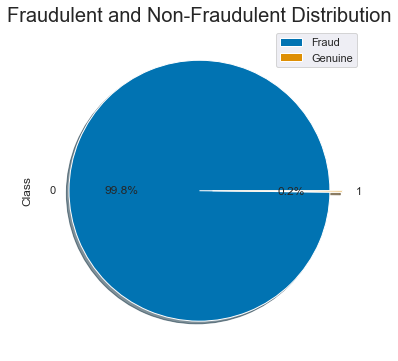

In [7]:
df["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()

**Highlights**

This dataset has 492 frauds out of 284,315 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Here we will observe the distribution of our classes

### Distribution of time w.r.t. transactions types

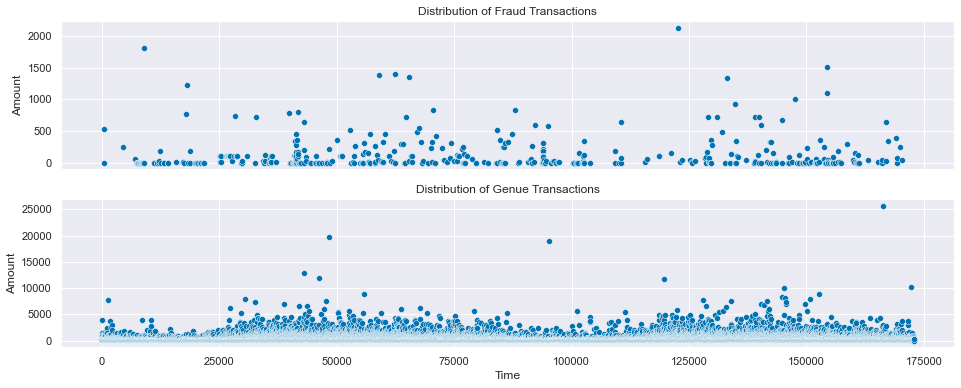

In [8]:
# Create a scatter plot to observe the distribution of classes with time and Amount
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()


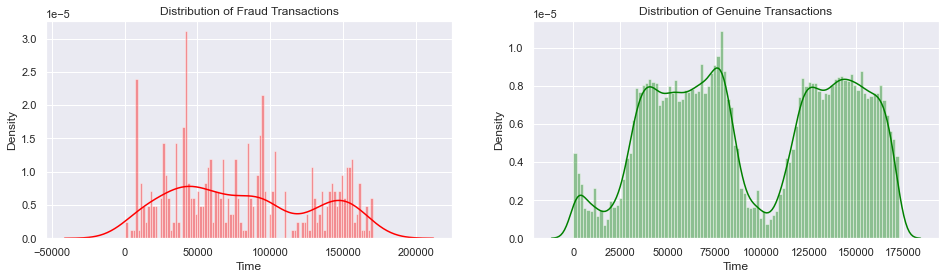

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

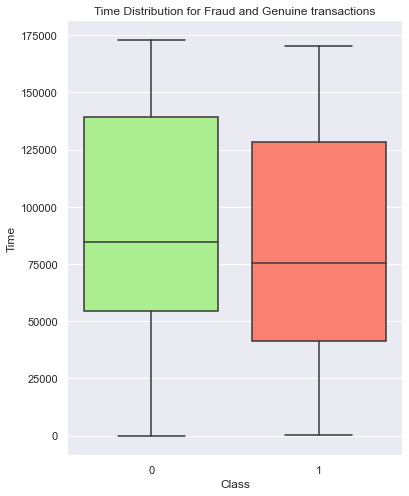

In [10]:
plt.figure(figsize=(6,8))
ax = sns.boxplot(x='Class', y='Time',data = df)

# Change the appearance of that box
ax.artists[0].set_facecolor('#AAEE90')
ax.artists[1].set_facecolor('#FA8072')

plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

In [11]:
# Currenlty not dropping any columns, since data is already PCA.
# Reducing columing here will not be appropriate as elimating the real feature.

### Splitting the data into train & test data

In [12]:
from sklearn.preprocessing import MinMaxScaler

df['normAmount'] = MinMaxScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724


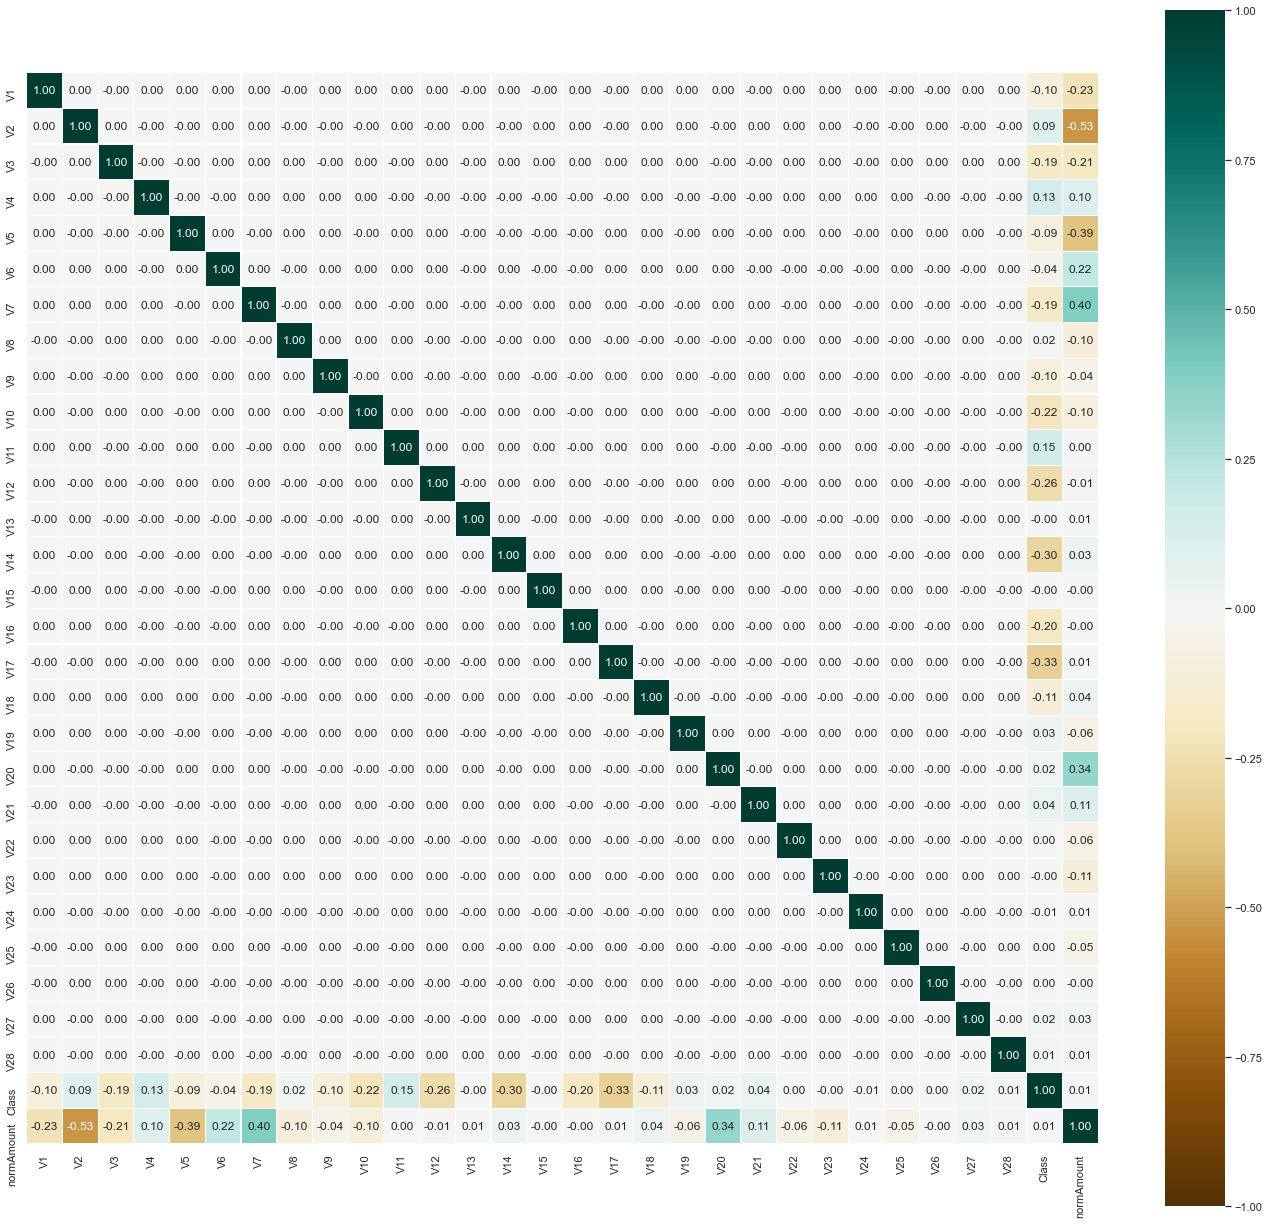

In [13]:
#Checking correlational with the data, although PCA automatically remove the correlation between the features.
colormap = plt.cm.BrBG

plt.figure(figsize=(24,22))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, vmin= -1.0,
            square=True, cmap = colormap, linecolor='white', annot=True,fmt='.2f')
plt.show()

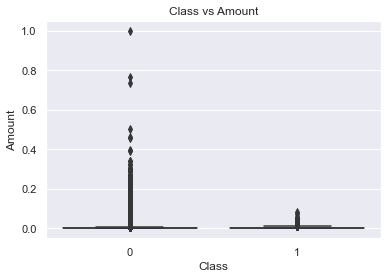

In [14]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
ax = sns.boxplot(x ="Class",y="normAmount",data=df)
ax.set_title('Class vs Amount')
ax.set_ylabel('Amount')
ax.set_xlabel('Class')

plt.show()

### Splitting the data

In [15]:
y = df["Class"].values # transforming the values in array
X = df.drop(["Class"], axis=1).values #Setting the X to do the split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,stratify=y)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

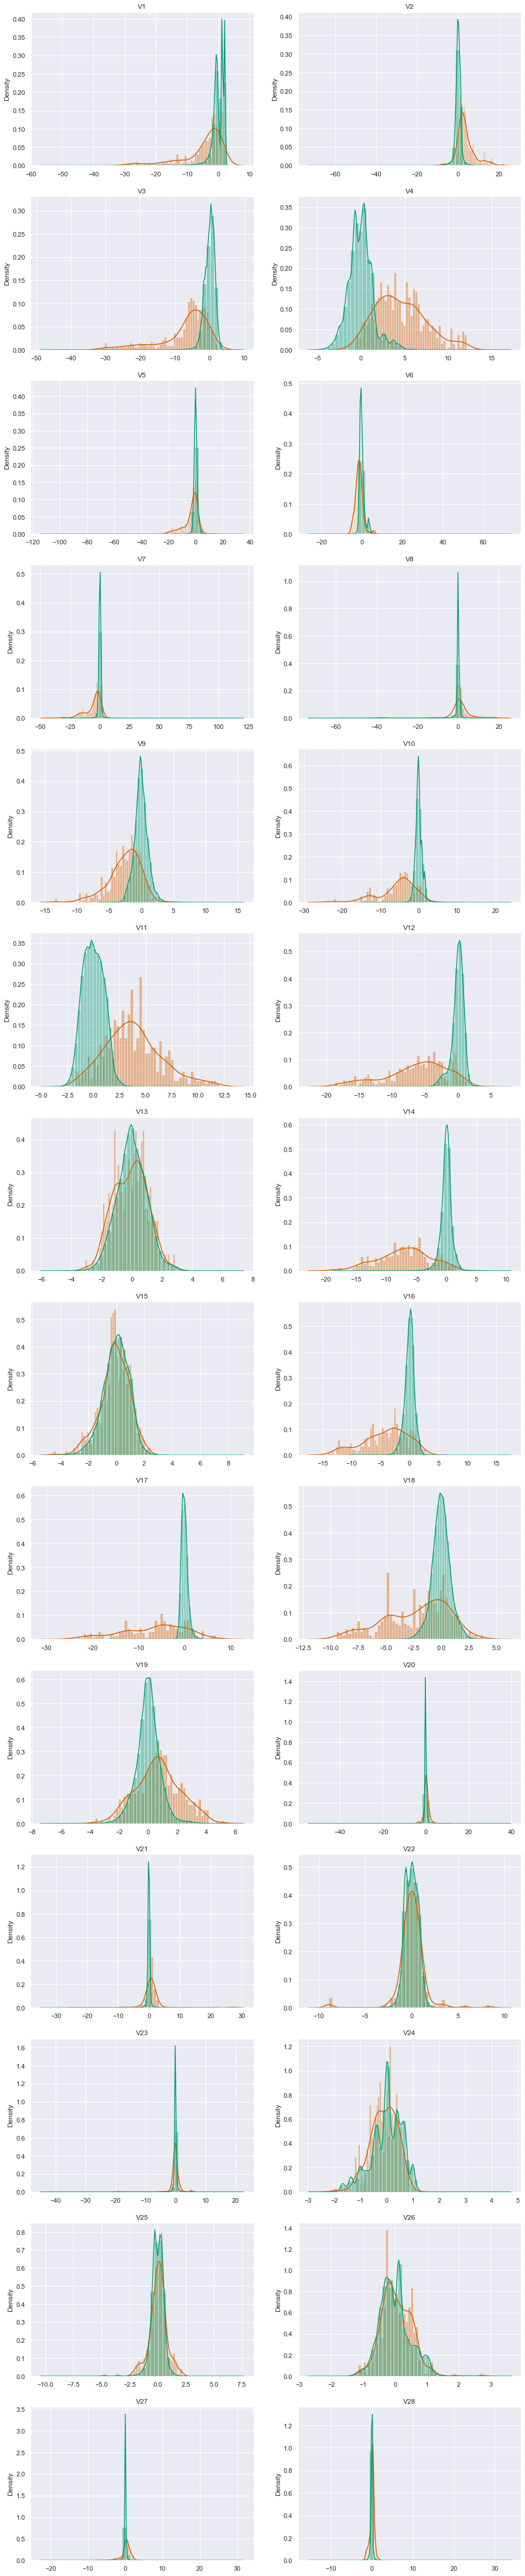

In [18]:
# plot the histogram of a variable from the dataset to see the skewness

columns = df.columns
columns = columns.drop(['Class','normAmount'])

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='r') # Green
    sns.distplot(df[col][normals], bins = 50, color='g') # Blue
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [19]:
y_train.reshape(-1, 1).shape

(199364, 1)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [20]:
from sklearn.preprocessing import PowerTransformer

# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt_X = PowerTransformer(copy=False)
pt_X.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt_X.transform(X_train)    ## Then apply on all data
X_test_pt = pt_X.transform(X_test)



In [21]:
# plot the histogram of a variable from the dataset again to see the result 
df_transform_X = pd.DataFrame(data = X_train_pt,columns=df.drop(["Class"], axis=1).columns)

In [22]:
df_transform_X['Class'] = y_train

In [23]:
df_transform_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-0.605880,0.956151,-0.403579,-0.120114,0.301469,-0.831189,0.593005,0.188185,-0.090810,-1.476086,-0.803474,-0.025982,0.221143,-1.568217,-0.997680,0.049006,1.711057,0.259145,-0.399444,-0.059015,0.125977,0.662083,-0.363190,-0.224058,-0.339100,1.196422,0.632853,0.613780,-0.606458,0
1,-0.683167,-0.358786,-0.106439,-1.529565,0.262249,0.647741,0.717858,-0.048139,-1.486440,0.287644,-0.448797,-0.865059,-0.430287,0.306145,-0.157003,-0.979769,-0.918603,1.934130,-0.595243,-0.756477,-0.538934,-0.882164,0.407671,-2.376692,-0.371030,1.786016,0.059794,0.024942,1.454271,0
2,1.355049,-0.049854,-1.168392,0.887239,0.400953,-0.441078,0.420874,-0.290904,0.106011,0.443165,0.364580,0.552766,-0.905576,0.911956,-1.207834,-0.539235,-0.577224,0.003786,0.240271,-0.359283,0.132470,0.489918,-0.118934,-0.738264,0.850014,-1.047003,-0.076788,-0.208189,-0.216038,0
3,0.315085,-1.255760,-0.171374,-1.834302,-1.438699,-0.982354,-0.306304,-0.294925,1.190649,-0.841389,-0.707094,-0.211027,-1.101959,0.183360,1.715984,-2.489657,0.525651,2.043061,0.424196,0.030965,-0.240074,-0.739692,-0.493030,0.573830,0.889365,-1.782488,0.093288,0.254335,2.081264,0
4,0.377683,-0.112448,0.144757,0.980338,-0.252579,-0.328499,0.271077,-0.263797,-0.180126,-0.032006,0.354700,1.281463,1.279442,0.085472,1.167226,-0.393878,-0.211669,-0.905962,-1.246958,0.233937,0.310987,0.626101,-0.297610,0.717511,1.071263,-0.559633,0.032762,0.159786,1.357275,0


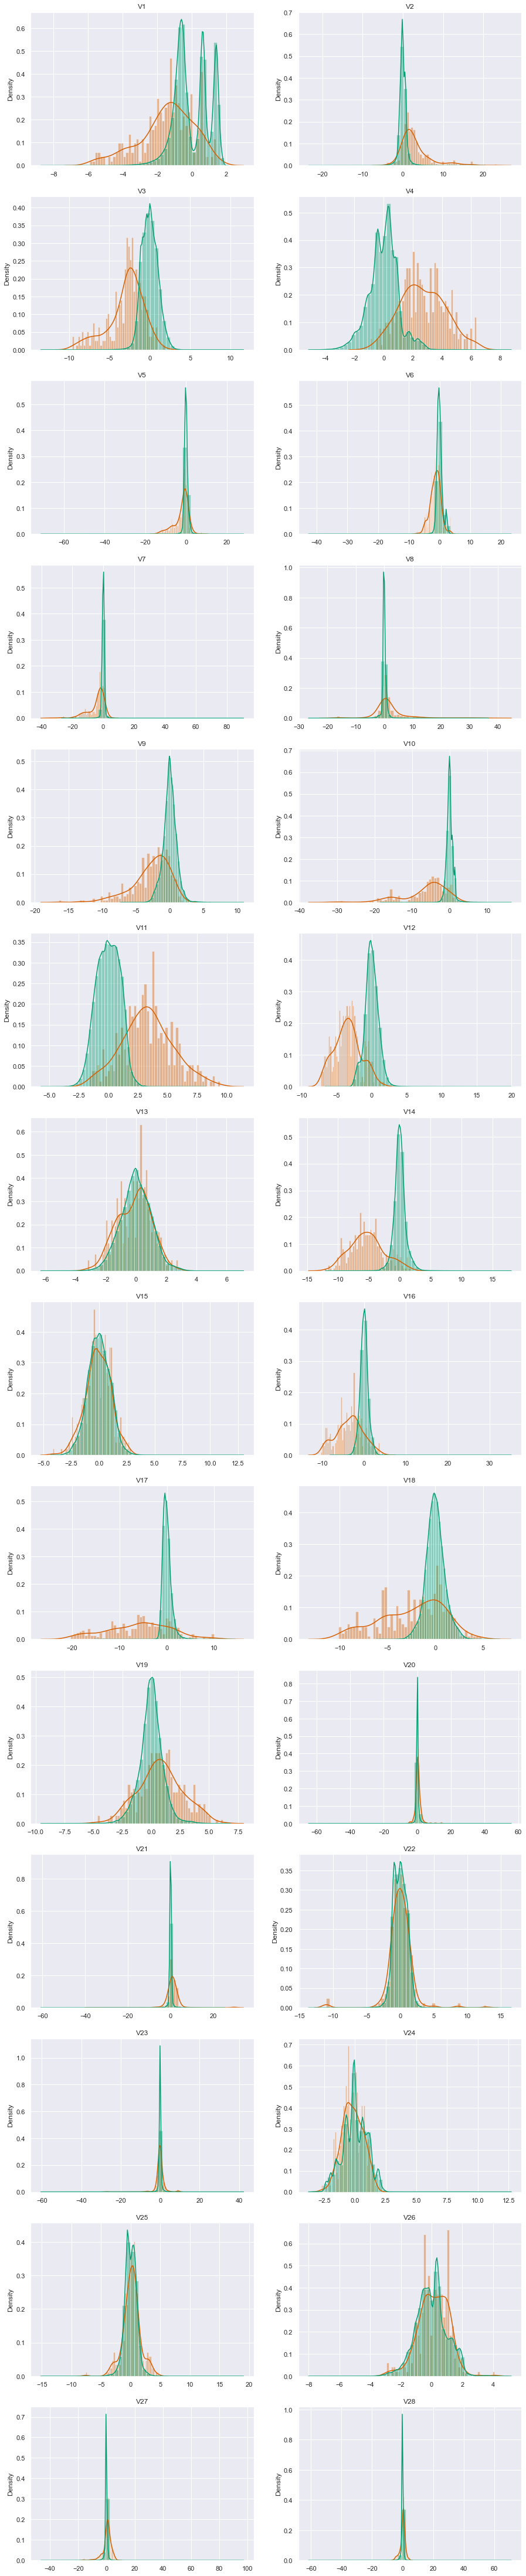

In [24]:
columns = df_transform_X.columns
columns = columns.drop(['normAmount','Class'])

frauds = df_transform_X.Class == 1
normals = df_transform_X.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_transform_X[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_transform_X[col][frauds], bins = 50, color='r') # Green
    sns.distplot(df_transform_X[col][normals], bins = 50, color='g') # Blue
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

 We are comparing the 2 data after before Power Transformer and after it. We can see some spikes reduce to normal distribution.

## Experiment concept of Model Building

We would following an differnt aproach here.

1  __Classification Models__

- Logistic Regression
- Decision Trees
- Random Forest
- Naive Bayes Classifier 

2  __Class Imbalance Solutions__

- Random Under Sampling
- Random Over Sampling
- SMOTE
- ADASYN

3  __Metrics__

- Accuracy Score
- Confusion Matrix
- Precision Score
- Recall Score
- ROC_AUC
- F1 Score


## <a id='logregim'>With Imbalanced dataset</a>

### **1. Logistic Regression**

In [25]:
# Importing All model and metrics library

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [26]:
LRmodel = LogisticRegression()

In [27]:
split_number = 5

In [28]:
cross_val = StratifiedKFold(n_splits=split_number)

In [29]:
model_details = pd.DataFrame(columns=['Model Name','Sampling','Accuracy Score','AUC Score','Precision Score','Recall Score','F1 Score','Best Params'])

##### Since this is imbalance dataset we will keep **cv = 5**.

In [64]:
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
LRmodel = LogisticRegression()

In [65]:
#perform both cross validation and hyperparameter
LR_search = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
LR_search.fit(X_train , y_train)
y_pred_lr = LR_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   20.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   21.4s finished


In [66]:
print('Logistic Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_lr))) 
print('Logistic AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_lr)))
print('Logistic Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_lr)))
print('Logistic Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_lr)))
print('Logistic F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr)))
print('Logistic Best Parameter : ' + str(LR_search.best_params_))

Logistic Accuracy :0.99915
Logistic AUC : 0.78710
Logistic Precision : 0.89474
Logistic Recall : 0.57432
Logistic F1 : 0.69959
Logistic Best Parameter : {'C': 0.01}


In [98]:
model_details_param = {
'Model Name': 'Logistic',
'Sampling': 'WO',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_lr),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_lr),
'Precision Score': metrics.precision_score(y_test , y_pred_lr),
'Recall Score': metrics.recall_score(y_test , y_pred_lr),
'F1 Score': metrics.f1_score(y_test , y_pred_lr),
'Best Params': str(LR_search.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [99]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}


### **2. KNN**

In [100]:
KNNparam_grid = { 'n_neighbors' : [5,10,15,20,25,30,35,40]}
KNNmodel = KNeighborsClassifier()

In [101]:
#perform both cross validation and hyperparameter
KNN_search = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
KNN_search.fit(X_train , y_train)
y_pred_knn = KNN_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 135.3min finished


In [102]:
print('KNN Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_knn))) 
print('KNN AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_knn)))
print('KNN Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_knn)))
print('KNN Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_knn)))
print('KNN F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_knn)))
print('KNN Best Parameter : ' + str(KNN_search.best_params_))

KNN Accuracy :0.99930
KNN AUC : 0.86475
KNN Precision : 0.84375
KNN Recall : 0.72973
KNN F1 : 0.78261
KNN Best Parameter : {'n_neighbors': 40}


In [103]:
model_details_param = {
'Model Name': 'KNN',
'Sampling': 'WO',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_knn),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_knn),
'Precision Score': metrics.precision_score(y_test , y_pred_knn),
'Recall Score': metrics.recall_score(y_test , y_pred_knn),
'F1 Score': metrics.f1_score(y_test , y_pred_knn),
'Best Params': str(KNN_search.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [104]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}


### **3. SVM**

In [105]:
SVCparam_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
SVCmodel = SVC()

In [106]:
#perform both cross validation and hyperparameter
SVC_search = RandomizedSearchCV(SVCmodel, param_distributions=SVCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
SVC_search.fit(X_train , y_train)
y_pred_svc = SVC_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 148.7min finished


In [107]:
print('SVC Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_svc))) 
print('SVC AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_svc)))
print('SVC Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_svc)))
print('SVC Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_svc)))
print('SVC F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_svc)))
print('SVC Best Parameter : ' + str(SVC_search.best_params_))

SVC Accuracy :0.99837
SVC AUC : 0.53041
SVC Precision : 1.00000
SVC Recall : 0.06081
SVC F1 : 0.11465
SVC Best Parameter : {'kernel': 'rbf', 'gamma': 1, 'C': 1}


In [108]:
model_details_param = {
'Model Name': 'SVC',
'Sampling': 'WO',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_svc),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_svc),
'Precision Score': metrics.precision_score(y_test , y_pred_svc),
'Recall Score': metrics.recall_score(y_test , y_pred_svc),
'F1 Score': metrics.f1_score(y_test , y_pred_svc),
'Best Params': str(SVC_search.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [109]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"


### **4. Decision Tree**

In [110]:
DTparam_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [2, 5, 10, 15, 20, 25, 30]
              }
DTmodel = DecisionTreeClassifier()

In [111]:
#perform both cross validation and hyperparameter
DT_search = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
DT_search.fit(X_train , y_train)
y_pred_dt = DT_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


In [112]:
print('DT Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_dt))) 
print('DT AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_dt)))
print('DT Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_dt)))
print('DT Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_dt)))
print('DT F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_dt)))
print('DT Best Parameter : ' + str(DT_search.best_params_))

DT Accuracy :0.99929
DT AUC : 0.84788
DT Precision : 0.86555
DT Recall : 0.69595
DT F1 : 0.77154
DT Best Parameter : {'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}


In [113]:
model_details_param = {
'Model Name': 'DT',
'Sampling': 'WO',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_dt),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_dt),
'Precision Score': metrics.precision_score(y_test , y_pred_dt),
'Recall Score': metrics.recall_score(y_test , y_pred_dt),
'F1 Score': metrics.f1_score(y_test , y_pred_dt),
'Best Params': str(DT_search.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [115]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"


### **5. Random Forest**

In [116]:
RFparam_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]
 }
RFmodel = RandomForestClassifier()

In [117]:
#perform both cross validation and hyperparameter
RF_search = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
RF_search.fit(X_train , y_train)
y_pred_rf = RF_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 185.8min finished


In [118]:
print('RF Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_rf))) 
print('RF AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rf)))
print('RF Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rf)))
print('RF Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rf)))
print('RF F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf)))
print('RF Best Parameter : ' + str(RF_search.best_params_))

RF Accuracy :0.99953
RF AUC : 0.88847
RF Precision : 0.94262
RF Recall : 0.77703
RF F1 : 0.85185
RF Best Parameter : {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [119]:
model_details_param = {
'Model Name': 'RF',
'Sampling': 'WO',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_rf),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_rf),
'Precision Score': metrics.precision_score(y_test , y_pred_rf),
'Recall Score': metrics.recall_score(y_test , y_pred_rf),
'F1 Score': metrics.f1_score(y_test , y_pred_rf),
'Best Params': str(RF_search.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [120]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


### **6. XGBoost**

In [121]:
XGCparam_grid = {
        'learning_rate': [0.01,0.05,0.1],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(100,1001,100)),
        "alpha":[0, 2, 4, 6, 8]
        }
XGCmodel = XGBClassifier()

In [122]:
#perform both cross validation and hyperparameter

XGC_search = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
XGC_search.fit(X_train , y_train)
y_pred_xgc = XGC_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 37.8min finished


[22:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [123]:
print('XGC Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_xgc))) 
print('XGC AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_xgc)))
print('XGC Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_xgc)))
print('XGC Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_xgc)))
print('XGC F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_xgc)))
print('XGC Best Parameter : ' + str(XGC_search.best_params_))

XGC Accuracy :0.99956
XGC AUC : 0.89860
XGC Precision : 0.93651
XGC Recall : 0.79730
XGC F1 : 0.86131
XGC Best Parameter : {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}


In [124]:
model_details_param = {
'Model Name': 'XGC',
'Sampling': 'WO',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_xgc),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_xgc),
'Precision Score': metrics.precision_score(y_test , y_pred_xgc),
'Recall Score': metrics.recall_score(y_test , y_pred_xgc),
'F1 Score': metrics.f1_score(y_test , y_pred_xgc),
'Best Params': str(XGC_search.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [125]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

#### Best accuracy we received in ***XG Boost*** model.

In [30]:
bestXGC_grid = {'subsample': [0.6], 'n_estimators': [500], 'min_child_weight': [7], 'max_depth': [10], 'learning_rate': [0.1], 'gamma': [0.5], 'colsample_bytree': [0.6], 'alpha': [4], 'seed' : [10]}
xgc_clf = XGBClassifier()  #initialise the model with optimum hyperparameters
clf = RandomizedSearchCV(xgc_clf, param_distributions=bestXGC_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.7min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


[18:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=N...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           valida

In [31]:
y_final_pred = clf.predict(X_test)

In [32]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_final_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_final_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_final_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_final_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_final_pred)))

Accuracy :0.99956
AUC : 0.90197
Precision : 0.92969
Recall : 0.80405
F1 : 0.86232


AUC -  0.9019742689521105 



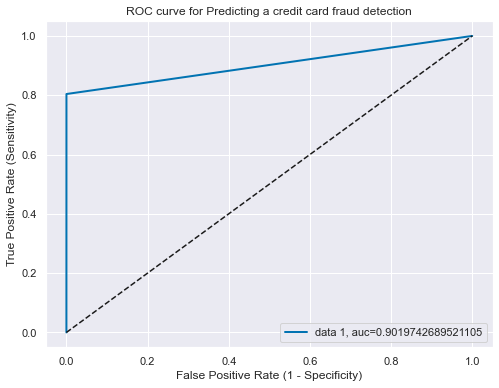

In [33]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_final_pred)

auc = metrics.roc_auc_score(y_test, y_final_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.862


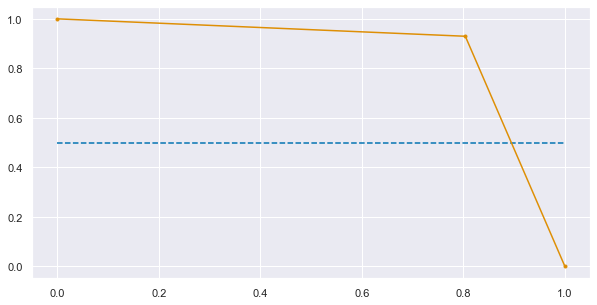

In [34]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_final_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_final_pred)
print('f1=%.3f' % (f1))

# plot no skill
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


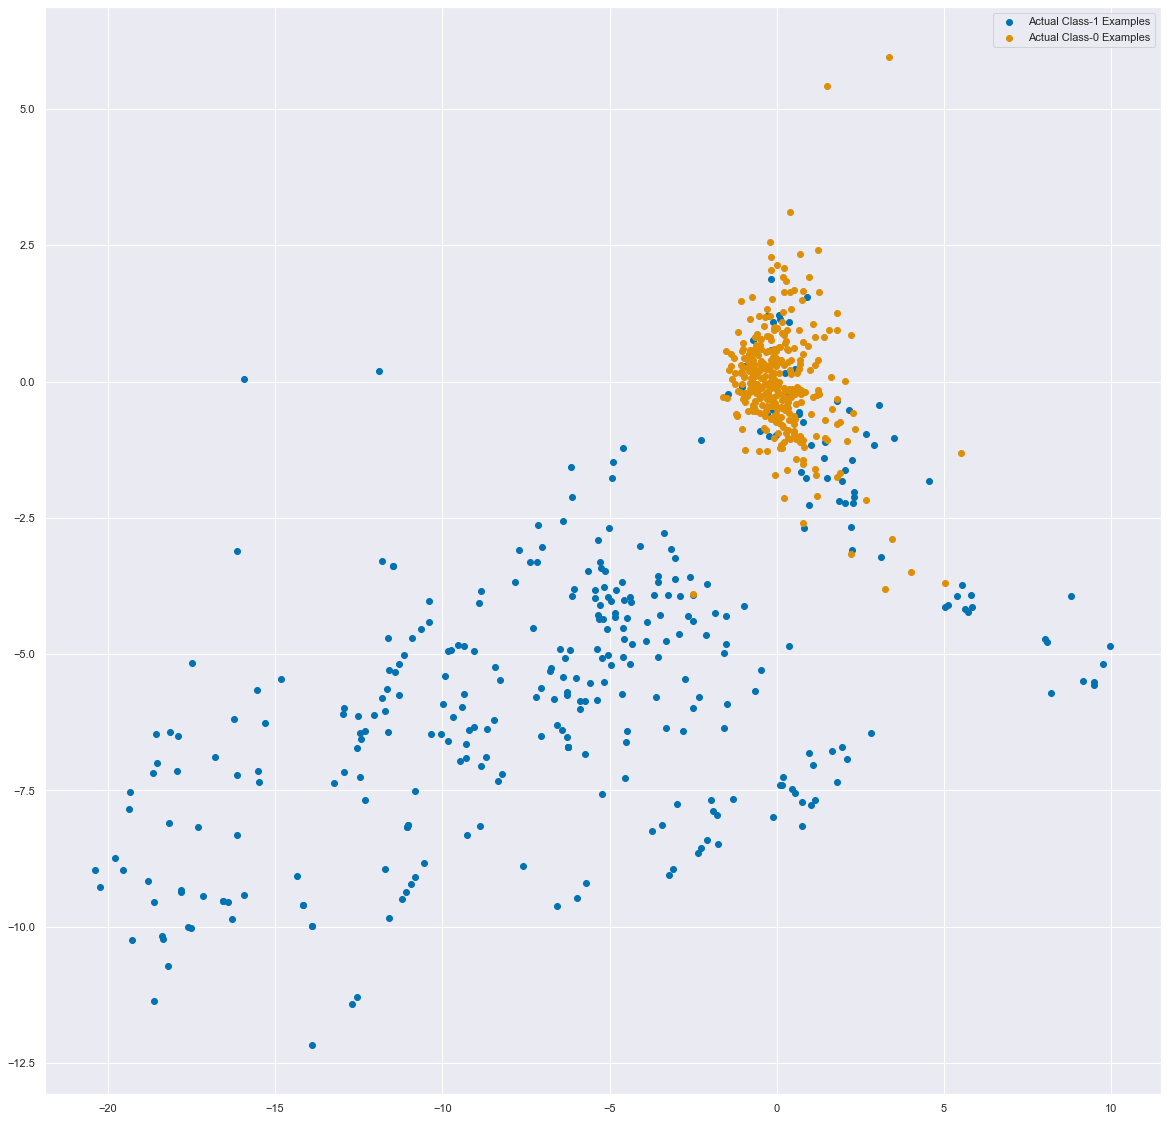

In [35]:
var_imp = []
clf = clf.best_estimator_
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## <a id='logregim'>With Balanced dataset</a>

##### Perform class balancing with :
- RandomUnderSamlping
- RandomOverSampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Logistic Regression

In [30]:
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
LRmodel = LogisticRegression()

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [31]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # counter takes values returns value_counts dictionary

### Print the class distribution after applying RandomUnderSampler 

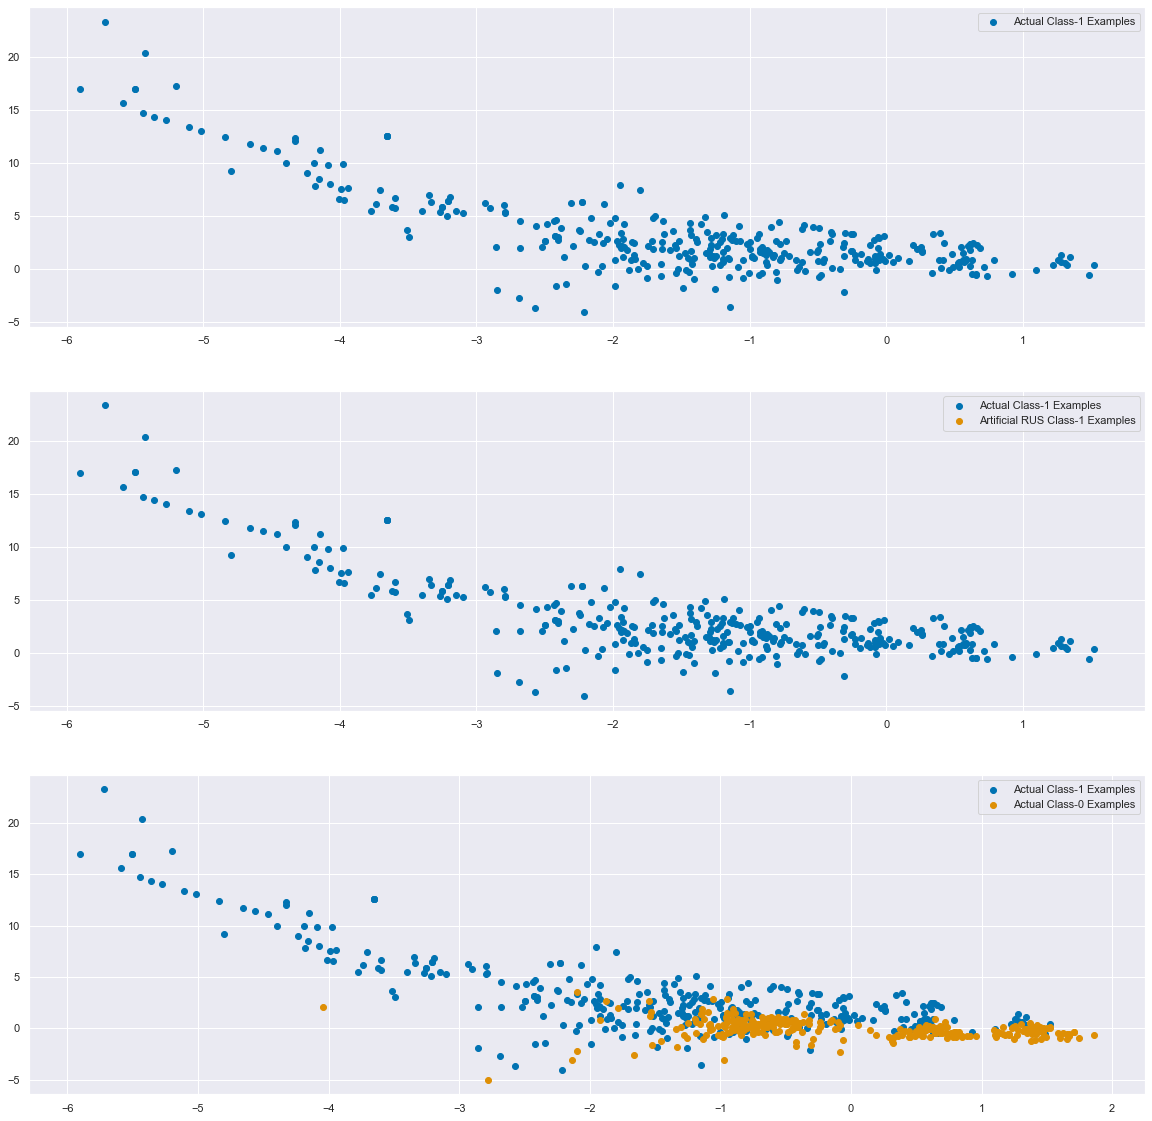

In [32]:
### Print the class distribution after applying RandomUnderSampler 

import warnings
warnings.filterwarnings("ignore")


sm = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from RandomUnderSampler are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from RandomUnderSampler, we do
X_train_rus_1 = X_train_rus[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_rus_1[:X_train_1.shape[0], 0], X_train_rus_1[:X_train_1.shape[0], 1],
            label='Artificial RUS Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying RandomOverSampler 

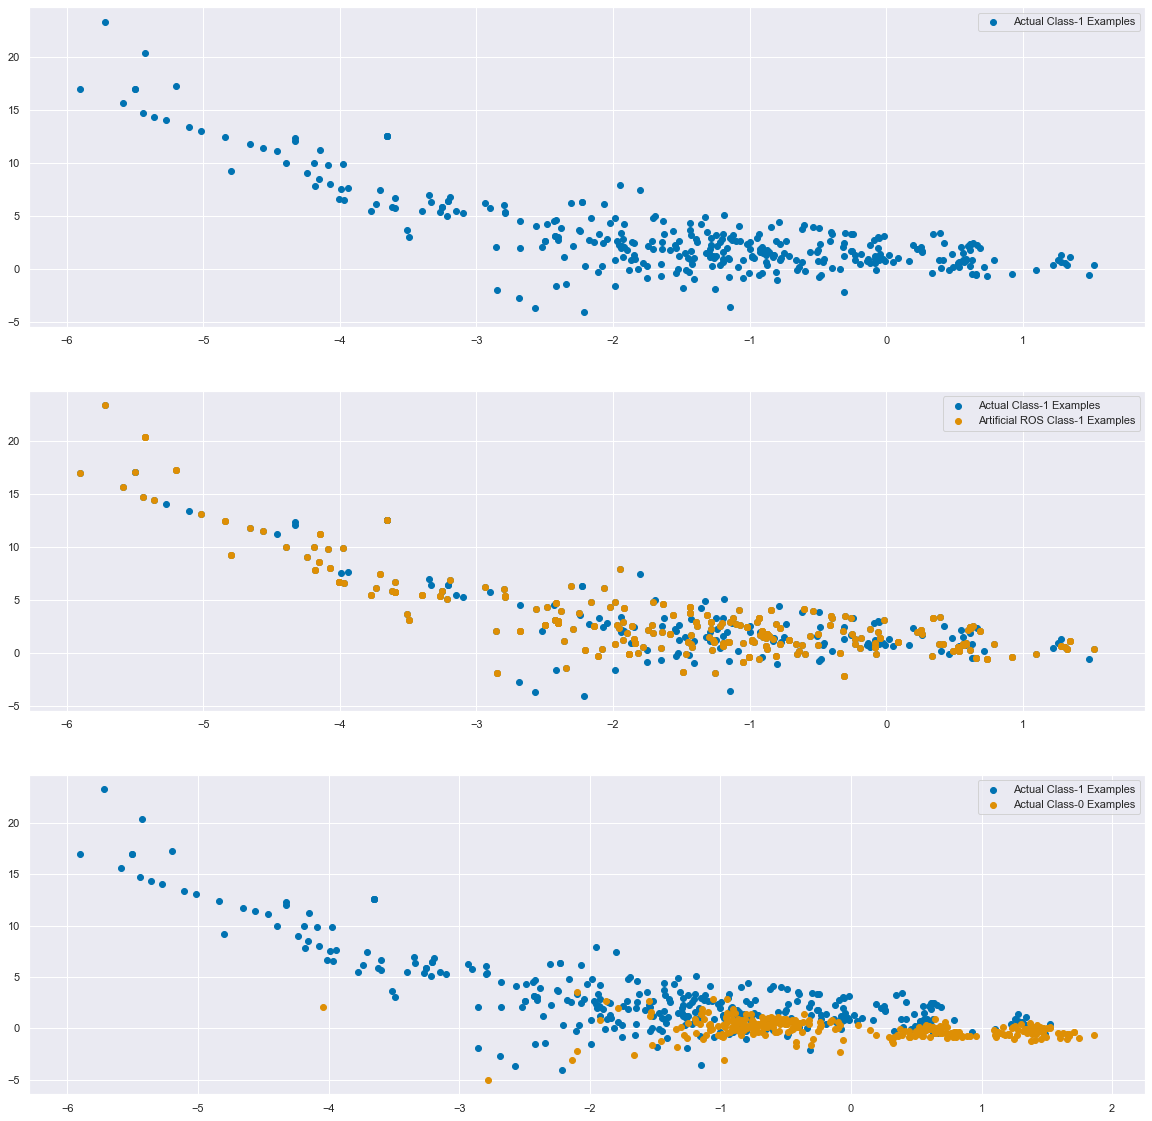

In [33]:
### Print the class distribution after applying RandomOverSampler 

import warnings
warnings.filterwarnings("ignore")


sm = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_ros_1 = X_train_ros[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1[:X_train_1.shape[0], 0], X_train_ros_1[:X_train_1.shape[0], 1],
            label='Artificial ROS Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying SMOTE 

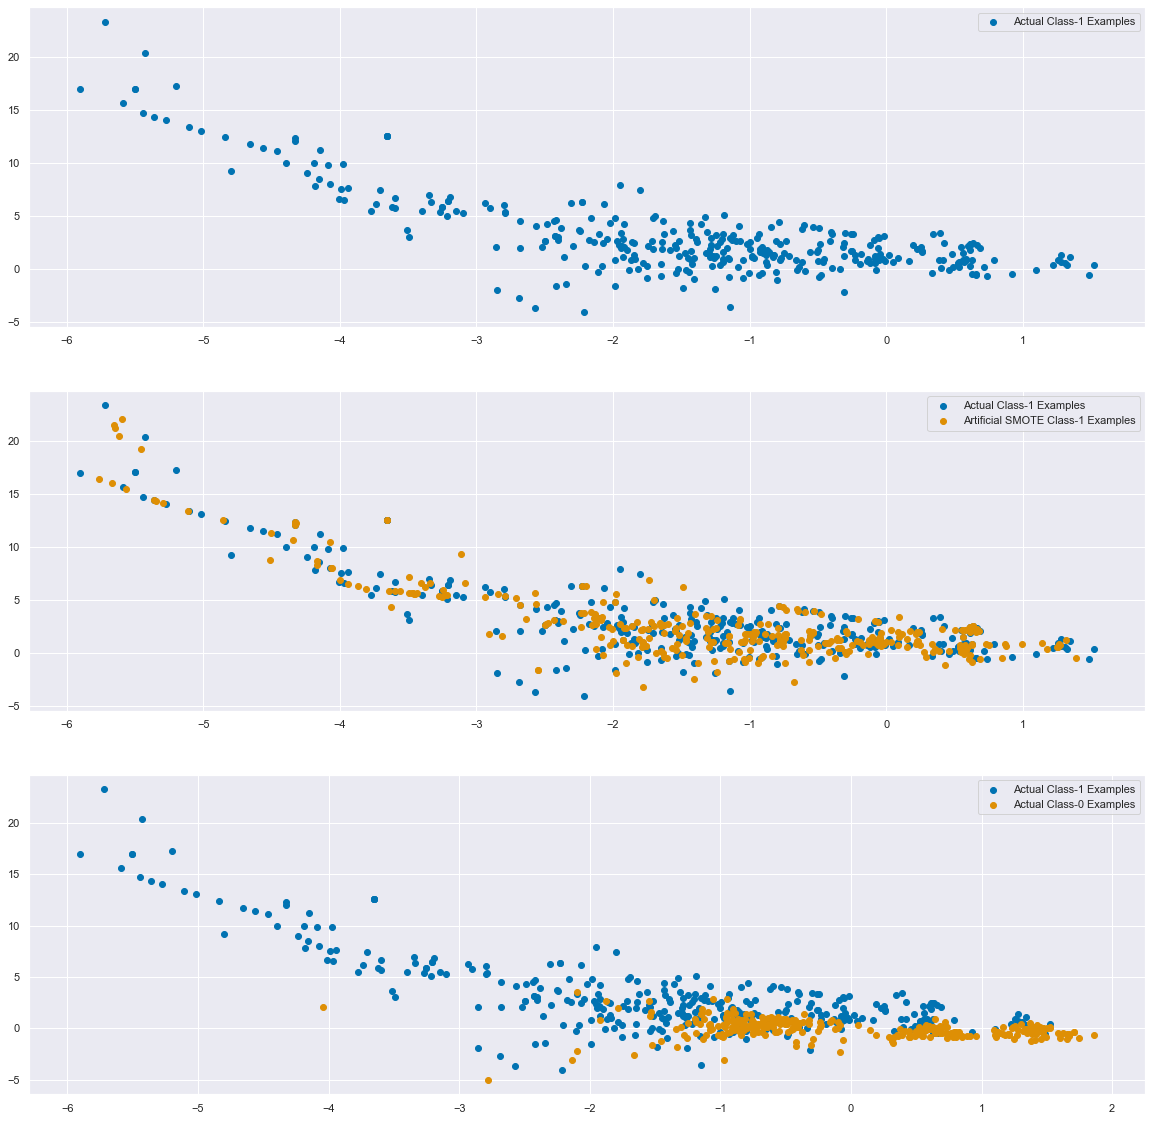

In [34]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

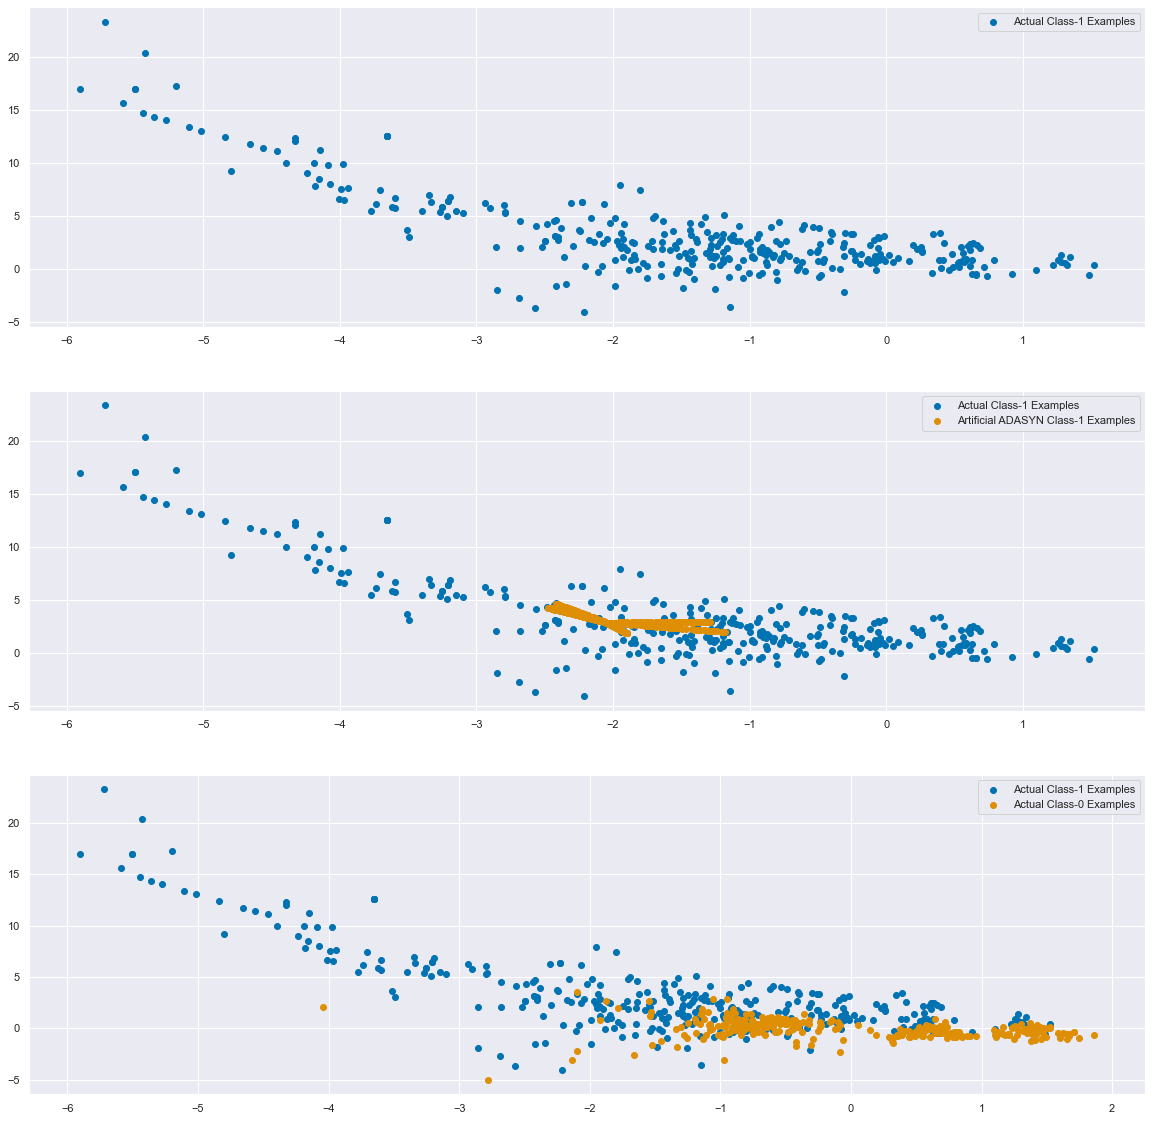

In [35]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on RandomUnderSampler, RandomOverSampler, SMOTE, ADASYN

In [36]:
# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Oversampling only on train
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# SMOTE only on train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ADASYN only on train
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [37]:
print('RUS Resampled dataset shape %s' % Counter(y_train_rus))
print('ROS: Resampled dataset shape %s' % Counter(y_train_ros))
print('SMOTE: Resampled dataset shape %s' % Counter(y_train_smote))
print('ADASYN: Resampled dataset shape %s' % Counter(y_train_adasyn))

RUS Resampled dataset shape Counter({0: 344, 1: 344})
ROS: Resampled dataset shape Counter({0: 199020, 1: 199020})
SMOTE: Resampled dataset shape Counter({0: 199020, 1: 199020})
ADASYN: Resampled dataset shape Counter({1: 199039, 0: 199020})


In [134]:
#perform both cross validation and hyperparameter
LR_search_rus = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
LR_search_rus.fit(X_train_rus , y_train_rus)
y_pred_lr_rus = LR_search_rus.best_estimator_.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


In [135]:
print('Logistic Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_lr_rus))) 
print('Logistic AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_lr_rus)))
print('Logistic Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_lr_rus)))
print('Logistic Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_lr_rus)))
print('Logistic F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr_rus)))
print('Logistic Best Parameter : ' + str(LR_search_rus.best_params_))

Logistic Accuracy :0.97615
Logistic AUC : 0.94084
Logistic Precision : 0.06209
Logistic Recall : 0.90541
Logistic F1 : 0.11622
Logistic Best Parameter : {'C': 0.1}


In [136]:
model_details_param = {
'Model Name': 'Logistic',
'Sampling': 'RUS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_lr_rus),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_lr_rus),
'Precision Score': metrics.precision_score(y_test , y_pred_lr_rus),
'Recall Score': metrics.recall_score(y_test , y_pred_lr_rus),
'F1 Score': metrics.f1_score(y_test , y_pred_lr_rus),
'Best Params': str(LR_search_rus.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [137]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


In [138]:
#perform both cross validation and hyperparameter
LR_search_ros = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
LR_search_ros.fit(X_train_ros , y_train_ros)
y_pred_lr_ros = LR_search_ros.best_estimator_.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   20.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   22.0s finished


In [139]:
print('Logistic Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_lr_ros))) 
print('Logistic AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_lr_ros)))
print('Logistic Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_lr_ros)))
print('Logistic Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_lr_ros)))
print('Logistic F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr_ros)))
print('Logistic Best Parameter : ' + str(LR_search_ros.best_params_))

Logistic Accuracy :0.97535
Logistic AUC : 0.94044
Logistic Precision : 0.06020
Logistic Recall : 0.90541
Logistic F1 : 0.11289
Logistic Best Parameter : {'C': 100}


In [140]:
model_details_param = {
'Model Name': 'Logistic',
'Sampling': 'ROS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_lr_ros),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_lr_ros),
'Precision Score': metrics.precision_score(y_test , y_pred_lr_ros),
'Recall Score': metrics.recall_score(y_test , y_pred_lr_ros),
'F1 Score': metrics.f1_score(y_test , y_pred_lr_ros),
'Best Params': str(LR_search_ros.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [141]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


In [142]:
#perform both cross validation and hyperparameter
LR_search_smote = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
LR_search_smote.fit(X_train_smote , y_train_smote)
y_pred_lr_smote = LR_search_smote.best_estimator_.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   21.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   22.1s finished


In [143]:
print('Logistic Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_lr_smote))) 
print('Logistic AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_lr_smote)))
print('Logistic Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_lr_smote)))
print('Logistic Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_lr_smote)))
print('Logistic F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr_smote)))
print('Logistic Best Parameter : ' + str(LR_search_smote.best_params_))

Logistic Accuracy :0.97289
Logistic AUC : 0.94258
Logistic Precision : 0.05537
Logistic Recall : 0.91216
Logistic F1 : 0.10441
Logistic Best Parameter : {'C': 1000}


In [144]:
model_details_param = {
'Model Name': 'Logistic',
'Sampling': 'SMOTE',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_lr_smote),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_lr_smote),
'Precision Score': metrics.precision_score(y_test , y_pred_lr_smote),
'Recall Score': metrics.recall_score(y_test , y_pred_lr_smote),
'F1 Score': metrics.f1_score(y_test , y_pred_lr_smote),
'Best Params': str(LR_search_smote.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [145]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


In [146]:
#perform both cross validation and hyperparameter
LR_search_adasyn = RandomizedSearchCV(LRmodel, param_distributions=LRparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
LR_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
y_pred_lr_adasyn = LR_search_adasyn.best_estimator_.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   21.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   23.4s finished


In [147]:
print('Logistic Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_lr_adasyn))) 
print('Logistic AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_lr_adasyn)))
print('Logistic Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_lr_adasyn)))
print('Logistic Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_lr_adasyn)))
print('Logistic F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr_adasyn)))
print('Logistic Best Parameter : ' + str(LR_search_adasyn.best_params_))

Logistic Accuracy :0.91299
Logistic AUC : 0.93281
Logistic Precision : 0.01863
Logistic Recall : 0.95270
Logistic F1 : 0.03655
Logistic Best Parameter : {'C': 1000}


In [148]:
model_details_param = {
'Model Name': 'Logistic',
'Sampling': 'ADASYN',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_lr_adasyn),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_lr_adasyn),
'Precision Score': metrics.precision_score(y_test , y_pred_lr_adasyn),
'Recall Score': metrics.recall_score(y_test , y_pred_lr_adasyn),
'F1 Score': metrics.f1_score(y_test , y_pred_lr_adasyn),
'Best Params': str(LR_search_adasyn.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [149]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


### **2. KNN**

In [150]:
KNNparam_grid = { 'n_neighbors' : [5,10,15,20,25,30,35,40]}
KNNmodel = KNeighborsClassifier()

In [151]:
#perform both cross validation and hyperparameter
KNN_search_rus = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
KNN_search_rus.fit(X_train_rus , y_train_rus)
y_pred_knn_rus = KNN_search_rus.best_estimator_.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [152]:
print('KNN Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_knn_rus))) 
print('KNN AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_knn_rus)))
print('KNN Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_knn_rus)))
print('KNN Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_knn_rus)))
print('KNN F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_knn_rus)))
print('KNN Best Parameter : ' + str(KNN_search_rus.best_params_))

KNN Accuracy :0.99244
KNN AUC : 0.92202
KNN Precision : 0.16800
KNN Recall : 0.85135
KNN F1 : 0.28062
KNN Best Parameter : {'n_neighbors': 30}


In [153]:
model_details_param = {
'Model Name': 'KNN',
'Sampling': 'RUS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_knn_rus),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_knn_rus),
'Precision Score': metrics.precision_score(y_test , y_pred_knn_rus),
'Recall Score': metrics.recall_score(y_test , y_pred_knn_rus),
'F1 Score': metrics.f1_score(y_test , y_pred_knn_rus),
'Best Params': str(KNN_search_rus.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [154]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


In [155]:
#perform both cross validation and hyperparameter
KNN_search_ros = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
KNN_search_ros.fit(X_train_ros , y_train_ros)
y_pred_knn_ros = KNN_search_ros.best_estimator_.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 95.7min finished


In [156]:
print('KNN Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_knn_ros))) 
print('KNN AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_knn_ros)))
print('KNN Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_knn_ros)))
print('KNN Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_knn_ros)))
print('KNN F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_knn_ros)))
print('KNN Best Parameter : ' + str(KNN_search_ros.best_params_))

KNN Accuracy :0.99912
KNN AUC : 0.91862
KNN Precision : 0.70857
KNN Recall : 0.83784
KNN F1 : 0.76780
KNN Best Parameter : {'n_neighbors': 5}


In [157]:
model_details_param = {
'Model Name': 'KNN',
'Sampling': 'ROS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_knn_ros),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_knn_ros),
'Precision Score': metrics.precision_score(y_test , y_pred_knn_ros),
'Recall Score': metrics.recall_score(y_test , y_pred_knn_ros),
'F1 Score': metrics.f1_score(y_test , y_pred_knn_ros),
'Best Params': str(KNN_search_ros.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [158]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


In [159]:
#perform both cross validation and hyperparameter
KNN_search_smote = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
KNN_search_smote.fit(X_train_smote , y_train_smote)
y_pred_knn_smote = KNN_search_smote.best_estimator_.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 99.8min finished


In [160]:
print('KNN Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_knn_smote))) 
print('KNN AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_knn_smote)))
print('KNN Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_knn_smote)))
print('KNN Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_knn_smote)))
print('KNN F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_knn_smote)))
print('KNN Best Parameter : ' + str(KNN_search_smote.best_params_))

KNN Accuracy :0.99073
KNN AUC : 0.93128
KNN Precision : 0.14302
KNN Recall : 0.87162
KNN F1 : 0.24571
KNN Best Parameter : {'n_neighbors': 40}


In [161]:
model_details_param = {
'Model Name': 'KNN',
'Sampling': 'SMOTE',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_knn_smote),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_knn_smote),
'Precision Score': metrics.precision_score(y_test , y_pred_knn_smote),
'Recall Score': metrics.recall_score(y_test , y_pred_knn_smote),
'F1 Score': metrics.f1_score(y_test , y_pred_knn_smote),
'Best Params': str(KNN_search_smote.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [162]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


In [163]:
#perform both cross validation and hyperparameter
KNN_search_adasyn = RandomizedSearchCV(KNNmodel, param_distributions=KNNparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
KNN_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
y_pred_knn_adasyn = KNN_search_adasyn.best_estimator_.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 122.9min finished


In [164]:
print('KNN Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_knn_adasyn))) 
print('KNN AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_knn_adasyn)))
print('KNN Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_knn_adasyn)))
print('KNN Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_knn_adasyn)))
print('KNN F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_knn_adasyn)))
print('KNN Best Parameter : ' + str(KNN_search_adasyn.best_params_))

KNN Accuracy :0.98965
KNN AUC : 0.92737
KNN Precision : 0.12903
KNN Recall : 0.86486
KNN F1 : 0.22456
KNN Best Parameter : {'n_neighbors': 40}


In [165]:
model_details_param = {
'Model Name': 'KNN',
'Sampling': 'ADASYN',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_knn_adasyn),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_knn_adasyn),
'Precision Score': metrics.precision_score(y_test , y_pred_knn_adasyn),
'Recall Score': metrics.recall_score(y_test , y_pred_knn_adasyn),
'F1 Score': metrics.f1_score(y_test , y_pred_knn_adasyn),
'Best Params': str(KNN_search_adasyn.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [166]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"


### **3. Decision Tree**

In [167]:
DTparam_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [2, 5, 10, 15, 20, 25, 30]
              }
DTmodel = DecisionTreeClassifier()

In [168]:
#perform both cross validation and hyperparameter
DT_search_rus = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
DT_search_rus.fit(X_train_rus , y_train_rus)
y_pred_dt_rus = DT_search_rus.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.5s finished


In [169]:
print('DT Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_dt_rus))) 
print('DT AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_dt_rus)))
print('DT Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_dt_rus)))
print('DT Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_dt_rus)))
print('DT F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_dt_rus)))
print('DT Best Parameter : ' + str(DT_search_rus.best_params_))

DT Accuracy :0.91630
DT AUC : 0.92435
DT Precision : 0.01896
DT Recall : 0.93243
DT F1 : 0.03716
DT Best Parameter : {'min_samples_split': 30, 'max_depth': 30, 'criterion': 'gini'}


In [170]:
model_details_param = {
'Model Name': 'Decision Tree',
'Sampling': 'RUS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_dt_rus),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_dt_rus),
'Precision Score': metrics.precision_score(y_test , y_pred_dt_rus),
'Recall Score': metrics.recall_score(y_test , y_pred_dt_rus),
'F1 Score': metrics.f1_score(y_test , y_pred_dt_rus),
'Best Params': str(DT_search_rus.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [171]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [172]:
#perform both cross validation and hyperparameter
DT_search_ros = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
DT_search_ros.fit(X_train_ros , y_train_ros)
y_pred_dt_ros = DT_search_ros.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


In [173]:
print('DT Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_dt_ros))) 
print('DT AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_dt_ros)))
print('DT Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_dt_ros)))
print('DT Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_dt_ros)))
print('DT F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_dt_ros)))
print('DT Best Parameter : ' + str(DT_search_ros.best_params_))

DT Accuracy :0.99904
DT AUC : 0.87811
DT Precision : 0.70886
DT Recall : 0.75676
DT F1 : 0.73203
DT Best Parameter : {'min_samples_split': 2, 'max_depth': 15, 'criterion': 'entropy'}


In [174]:
model_details_param = {
'Model Name': 'Decision Tree',
'Sampling': 'ROS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_dt_ros),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_dt_ros),
'Precision Score': metrics.precision_score(y_test , y_pred_dt_ros),
'Recall Score': metrics.recall_score(y_test , y_pred_dt_ros),
'F1 Score': metrics.f1_score(y_test , y_pred_dt_ros),
'Best Params': str(DT_search_ros.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [175]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [176]:
#perform both cross validation and hyperparameter
DT_search_smote = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
DT_search_smote.fit(X_train_smote , y_train_smote)
y_pred_dt_smote = DT_search_smote.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


In [177]:
print('DT Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_dt_smote))) 
print('DT AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_dt_smote)))
print('DT Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_dt_smote)))
print('DT Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_dt_smote)))
print('DT F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_dt_smote)))
print('DT Best Parameter : ' + str(DT_search_smote.best_params_))

DT Accuracy :0.99376
DT AUC : 0.91594
DT Precision : 0.19589
DT Recall : 0.83784
DT F1 : 0.31754
DT Best Parameter : {'min_samples_split': 40, 'max_depth': 15, 'criterion': 'entropy'}


In [178]:
model_details_param = {
'Model Name': 'Decision Tree',
'Sampling': 'SMOTE',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_dt_smote),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_dt_smote),
'Precision Score': metrics.precision_score(y_test , y_pred_dt_smote),
'Recall Score': metrics.recall_score(y_test , y_pred_dt_smote),
'F1 Score': metrics.f1_score(y_test , y_pred_dt_smote),
'Best Params': str(DT_search_smote.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [179]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [180]:
#perform both cross validation and hyperparameter
DT_search_adasyn = RandomizedSearchCV(DTmodel, param_distributions=DTparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
DT_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
y_pred_dt_adasyn = DT_search_adasyn.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


In [181]:
print('DT Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_dt_adasyn))) 
print('DT AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_dt_adasyn)))
print('DT Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_dt_adasyn)))
print('DT Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_dt_adasyn)))
print('DT F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_dt_adasyn)))
print('DT Best Parameter : ' + str(DT_search_adasyn.best_params_))

DT Accuracy :0.96715
DT AUC : 0.92284
DT Precision : 0.04454
DT Recall : 0.87838
DT F1 : 0.08477
DT Best Parameter : {'min_samples_split': 30, 'max_depth': 10, 'criterion': 'entropy'}


In [182]:
model_details_param = {
'Model Name': 'Decision Tree',
'Sampling': 'ADASYN',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_dt_adasyn),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_dt_adasyn),
'Precision Score': metrics.precision_score(y_test , y_pred_dt_adasyn),
'Recall Score': metrics.recall_score(y_test , y_pred_dt_adasyn),
'F1 Score': metrics.f1_score(y_test , y_pred_dt_adasyn),
'Best Params': str(DT_search_adasyn.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [183]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


### **5. Random Forest**

In [44]:
RFparam_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]
 }
RFmodel = RandomForestClassifier()

In [185]:
#perform both cross validation and hyperparameter
RF_search_rus = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
RF_search_rus.fit(X_train_rus , y_train_rus)
y_pred_rf_rus = RF_search_rus.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.0s finished


In [186]:
print('RF Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_rf_rus))) 
print('RF AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rf_rus)))
print('RF Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rf_rus)))
print('RF Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rf_rus)))
print('RF F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf_rus)))
print('RF Best Parameter : ' + str(RF_search_rus.best_params_))

RF Accuracy :0.98034
RF AUC : 0.94294
RF Precision : 0.07444
RF Recall : 0.90541
RF F1 : 0.13758
RF Best Parameter : {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}


In [187]:
model_details_param = {
'Model Name': 'Random Forest',
'Sampling': 'RUS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_rf_rus),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_rf_rus),
'Precision Score': metrics.precision_score(y_test , y_pred_rf_rus),
'Recall Score': metrics.recall_score(y_test , y_pred_rf_rus),
'F1 Score': metrics.f1_score(y_test , y_pred_rf_rus),
'Best Params': str(RF_search_rus.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [188]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [189]:
#perform both cross validation and hyperparameter
RF_search_ros = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
RF_search_ros.fit(X_train_ros , y_train_ros)
y_pred_rf_ros = RF_search_ros.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 92.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 208.9min finished


In [190]:
print('RF Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_rf_ros))) 
print('RF AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rf_ros)))
print('RF Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rf_ros)))
print('RF Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rf_ros)))
print('RF F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf_ros)))
print('RF Best Parameter : ' + str(RF_search_ros.best_params_))

RF Accuracy :0.99953
RF AUC : 0.89184
RF Precision : 0.93548
RF Recall : 0.78378
RF F1 : 0.85294
RF Best Parameter : {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [191]:
model_details_param = {
'Model Name': 'Random Forest',
'Sampling': 'ROS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_rf_ros),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_rf_ros),
'Precision Score': metrics.precision_score(y_test , y_pred_rf_ros),
'Recall Score': metrics.recall_score(y_test , y_pred_rf_ros),
'F1 Score': metrics.f1_score(y_test , y_pred_rf_ros),
'Best Params': str(RF_search_ros.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [192]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [193]:
#perform both cross validation and hyperparameter
RF_search_smote = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
RF_search_smote.fit(X_train_smote , y_train_smote)
y_pred_rf_smote = RF_search_smote.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 154.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 439.8min finished


In [194]:
print('RF Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_rf_smote))) 
print('RF AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rf_smote)))
print('RF Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rf_smote)))
print('RF Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rf_smote)))
print('RF F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf_smote)))
print('RF Best Parameter : ' + str(RF_search_smote.best_params_))

RF Accuracy :0.99938
RF AUC : 0.91200
RF Precision : 0.81879
RF Recall : 0.82432
RF F1 : 0.82155
RF Best Parameter : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [195]:
model_details_param = {
'Model Name': 'Random Forest',
'Sampling': 'SMOTE',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_rf_smote),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_rf_smote),
'Precision Score': metrics.precision_score(y_test , y_pred_rf_smote),
'Recall Score': metrics.recall_score(y_test , y_pred_rf_smote),
'F1 Score': metrics.f1_score(y_test , y_pred_rf_smote),
'Best Params': str(RF_search_smote.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [196]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [45]:
#perform both cross validation and hyperparameter
RF_search_adasyn = RandomizedSearchCV(RFmodel, param_distributions=RFparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
RF_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
y_pred_rf_adasyn = RF_search_adasyn.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 121.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 333.0min finished


In [46]:
print('RF Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_rf_adasyn))) 
print('RF AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rf_adasyn)))
print('RF Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rf_adasyn)))
print('RF Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rf_adasyn)))
print('RF F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf_adasyn)))
print('RF Best Parameter : ' + str(RF_search_adasyn.best_params_))

RF Accuracy :0.99941
RF AUC : 0.91202
RF Precision : 0.83562
RF Recall : 0.82432
RF F1 : 0.82993
RF Best Parameter : {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}


In [48]:
model_details_param = {
'Model Name': 'Random Forest',
'Sampling': 'ADASYN',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_rf_adasyn),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_rf_adasyn),
'Precision Score': metrics.precision_score(y_test , y_pred_rf_adasyn),
'Recall Score': metrics.recall_score(y_test , y_pred_rf_adasyn),
'F1 Score': metrics.f1_score(y_test , y_pred_rf_adasyn),
'Best Params': str(RF_search_adasyn.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [49]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


### **6. XGBoost**

In [50]:
XGCparam_grid = {
        'learning_rate': [0.01,0.05,0.1],
        'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "n_estimators": list(range(100,1001,100)),
        "alpha":[0, 2, 4, 6, 8]
        }
XGCmodel = XGBClassifier()

In [51]:
#perform both cross validation and hyperparameter
XGC_search_rus = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
XGC_search_rus.fit(X_train_rus , y_train_rus)
y_pred_xgc_rus = XGC_search_rus.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.4s finished


[01:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
print('XGC Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_xgc_rus))) 
print('XGC AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_xgc_rus)))
print('XGC Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_xgc_rus)))
print('XGC Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_xgc_rus)))
print('XGC F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_xgc_rus)))
print('XGC Best Parameter : ' + str(XGC_search_rus.best_params_))

XGC Accuracy :0.96629
XGC AUC : 0.93927
XGC Precision : 0.04497
XGC Recall : 0.91216
XGC F1 : 0.08571
XGC Best Parameter : {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 8, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.1, 'alpha': 2}


In [53]:
model_details_param = {
'Model Name': 'XGBoost',
'Sampling': 'RUS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_xgc_rus),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_xgc_rus),
'Precision Score': metrics.precision_score(y_test , y_pred_xgc_rus),
'Recall Score': metrics.recall_score(y_test , y_pred_xgc_rus),
'F1 Score': metrics.f1_score(y_test , y_pred_xgc_rus),
'Best Params': str(XGC_search_rus.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [54]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [55]:
#perform both cross validation and hyperparameter
XGC_search_ros = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
XGC_search_ros.fit(X_train_ros , y_train_ros)
y_pred_xgc_ros = XGC_search_ros.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 71.3min finished


[02:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
print('XGC Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_xgc_ros))) 
print('XGC AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_xgc_ros)))
print('XGC Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_xgc_ros)))
print('XGC Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_xgc_ros)))
print('XGC F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_xgc_ros)))
print('XGC Best Parameter : ' + str(XGC_search_ros.best_params_))

XGC Accuracy :0.99950
XGC AUC : 0.91881
XGC Precision : 0.86713
XGC Recall : 0.83784
XGC F1 : 0.85223
XGC Best Parameter : {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 1.5, 'colsample_bytree': 0.4, 'alpha': 0}


In [57]:
model_details_param = {
'Model Name': 'XGBoost',
'Sampling': 'ROS',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_xgc_ros),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_xgc_ros),
'Precision Score': metrics.precision_score(y_test , y_pred_xgc_ros),
'Recall Score': metrics.recall_score(y_test , y_pred_xgc_ros),
'F1 Score': metrics.f1_score(y_test , y_pred_xgc_ros),
'Best Params': str(XGC_search_ros.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [60]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [61]:
#perform both cross validation and hyperparameter
XGC_search_smote = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
XGC_search_smote.fit(X_train_smote , y_train_smote)
y_pred_xgc_smote = XGC_search_smote.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 134.7min finished


[11:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
print('XGC Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_xgc_smote))) 
print('XGC AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_xgc_smote)))
print('XGC Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_xgc_smote)))
print('XGC Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_xgc_smote)))
print('XGC F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_xgc_smote)))
print('XGC Best Parameter : ' + str(XGC_search_smote.best_params_))

XGC Accuracy :0.99913
XGC AUC : 0.92200
XGC Precision : 0.71023
XGC Recall : 0.84459
XGC F1 : 0.77160
XGC Best Parameter : {'subsample': 0.4, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.6, 'alpha': 0}


In [63]:
model_details_param = {
'Model Name': 'XGBoost',
'Sampling': 'SMOTE',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_xgc_smote),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_xgc_smote),
'Precision Score': metrics.precision_score(y_test , y_pred_xgc_smote),
'Recall Score': metrics.recall_score(y_test , y_pred_xgc_smote),
'F1 Score': metrics.f1_score(y_test , y_pred_xgc_smote),
'Best Params': str(XGC_search_smote.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [41]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


In [65]:
#perform both cross validation and hyperparameter for coarse tuning
XGC_search_adasyn = RandomizedSearchCV(XGCmodel, param_distributions=XGCparam_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
# fitting the model for grid search 
XGC_search_adasyn.fit(X_train_adasyn , y_train_adasyn)
y_pred_xgc_adasyn = XGC_search_adasyn.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 119.4min finished


[14:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
print('XGC Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_xgc_adasyn))) 
print('XGC AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_xgc_adasyn)))
print('XGC Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_xgc_adasyn)))
print('XGC Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_xgc_adasyn)))
print('XGC F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_xgc_adasyn)))
print('XGC Best Parameter : ' + str(XGC_search_adasyn.best_params_))

XGC Accuracy :0.99898
XGC AUC : 0.92867
XGC Precision : 0.65803
XGC Recall : 0.85811
XGC F1 : 0.74487
XGC Best Parameter : {'subsample': 0.8, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1.5, 'colsample_bytree': 0.3, 'alpha': 6}


In [67]:
model_details_param = {
'Model Name': 'XGBoost',
'Sampling': 'ADASYN',
'Accuracy Score': metrics.accuracy_score(y_test , y_pred_xgc_adasyn),
'AUC Score': metrics.roc_auc_score(y_test , y_pred_xgc_adasyn),
'Precision Score': metrics.precision_score(y_test , y_pred_xgc_adasyn),
'Recall Score': metrics.recall_score(y_test , y_pred_xgc_adasyn),
'F1 Score': metrics.f1_score(y_test , y_pred_xgc_adasyn),
'Best Params': str(XGC_search_adasyn.best_params_)
}
model_details = model_details.append(model_details_param,ignore_index=True)

In [39]:
model_details.head(model_details.shape[0])

,Model Name,Sampling,Accuracy Score,AUC Score,Precision Score,Recall Score,F1 Score,Best Params
0,Logistic,WO,0.999567,0.905353,0.930233,0.810811,0.866426,{'C': 0.01}
1,KNN,WO,0.999298,0.864748,0.843750,0.729730,0.782609,{'n_neighbors': 40}
2,SVC,WO,0.998373,0.530405,1.000000,0.060811,0.114650,"{'kernel': 'rbf', 'gamma': 1, 'C': 1}"
3,DT,WO,0.999286,0.847879,0.865546,0.695946,0.771536,"{'min_samples_split': 20, 'max_depth': 2, 'criterion': 'entropy'}"
4,RF,WO,0.999532,0.888472,0.942623,0.777027,0.851852,"{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}"
5,XGC,WO,0.999555,0.898602,0.936508,0.797297,0.861314,"{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6, 'alpha': 4}"
6,Logistic,RUS,0.976148,0.940838,0.062095,0.905405,0.116219,{'C': 0.1}
7,Logistic,ROS,0.975352,0.940439,0.060198,0.905405,0.112890,{'C': 100}
8,Logistic,SMOTE,0.972894,0.942581,0.055373,0.912162,0.104408,{'C': 1000}
9,Logistic,ADASYN,0.912995,0.932814,0.018631,0.952703,0.036547,{'C': 1000}


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

#### As per the expiment above we found that RandomOverSampling along with XGBoost provide best stable accuracy.

In [42]:
# perform the best oversampling method on X_train & y_train

bestXGC_grid = {'subsample': [0.9], 'n_estimators': [1000], 'min_child_weight': [10], 'max_depth': [6], 'learning_rate': [0.05]
                , 'gamma': [1.5], 'colsample_bytree': [0.4], 'alpha': [0]}
xgc_ros = XGBClassifier()  #initialise the model with optimum hyperparameters
clf_ros = RandomizedSearchCV(xgc_ros, param_distributions=bestXGC_grid,scoring='roc_auc', refit = True, verbose = 3, cv=cross_val, n_jobs=-1)
clf_ros.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 17.1min remaining: 25.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.2min finished


[15:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=N...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsa

In [43]:
y_final_ros_pred = clf_ros.predict(X_test)

In [44]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_final_ros_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_final_ros_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_final_ros_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_final_ros_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_final_ros_pred)))

Accuracy :0.99950
AUC : 0.91881
Precision : 0.86713
Recall : 0.83784
F1 : 0.85223


AUC -  0.9188075407607619 



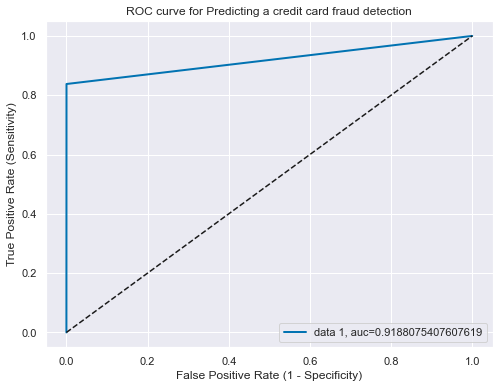

In [45]:
# plot ROC Curve with SMOTE Oversampling

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_final_ros_pred)

auc = metrics.roc_auc_score(y_test, y_final_ros_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.852


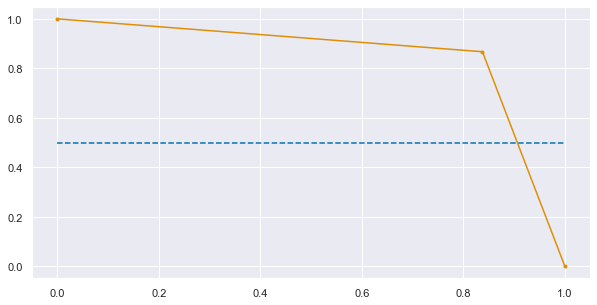

In [46]:
# calculate precision-recall curve with SMOTE Oversampling
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_final_ros_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_final_ros_pred)
print('f1=%.3f' % (f1))

# plot no skill
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


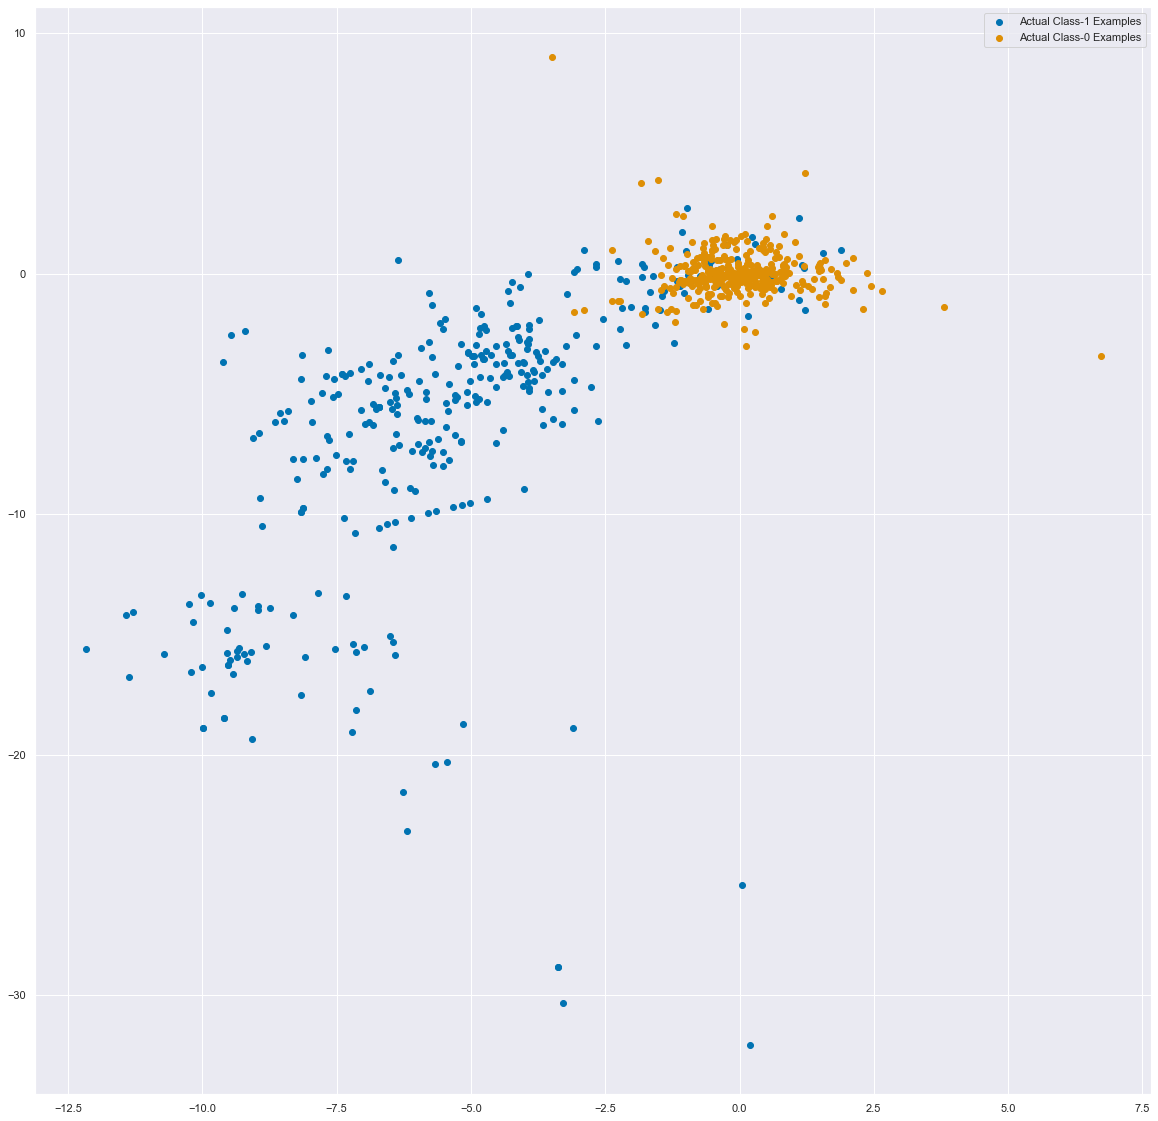

In [47]:
var_imp = []
clf_ros = clf_ros.best_estimator_
for i in clf_ros.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_ros.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_ros.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_ros.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_ros.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_ros.feature_importances_)[-2])

X_train_1_ros = X_train_ros[np.where(y_train==1.0)]
X_train_0_ros = X_train_ros[np.where(y_train==0.0)]

np.random.shuffle(X_train_0_ros)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1_ros[:, top_var_index], X_train_1_ros[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0_ros[:X_train_1_ros.shape[0], top_var_index], X_train_0_ros[:X_train_1_ros.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### XG Boost without Sampling
- Accuracy :0.99956
- AUC : 0.90197
- Precision : 0.92969
- Recall : 0.80405
- F1 : 0.86232

#### XG Boost with RandomOverSampling
- Accuracy :0.99950
- AUC : 0.91881
- Precision : 0.86713
- Recall : 0.83784
- F1 : 0.85223

## Conclusion

- We consider XGBoost provide best accuracy, as it had provide overall accuracy better.
- We can observe that with sampling AUC score rise but other score got decrease
- Without sampling all score are nearbout on the average toward apprx 90%
- Accuracy can be more increase if we would have dropped some data as well. Although 90-91% is not fair accuracy with full data.
- We did find that RandomUnderSampling provide great accuracy, but it is calculated with less number of data. Since this is financial matter model should be train on plenty on dataset. 
